In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/kaggle/input/social-network-ad/Social_Network_Ads.csv')

print("\n1. DATASET INFORMATION")
print(f"Dataset shape: {df.shape}")
print(f"\nDataset Info:")
df.info()


1. DATASET INFORMATION
Dataset shape: (50000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 50000 non-null  int64  
 1   EstimatedSalary     50000 non-null  int64  
 2   Gender              50000 non-null  object 
 3   IsStudent           50000 non-null  int64  
 4   DailyInternetUsage  50000 non-null  int64  
 5   TimeSpentOnApp      50000 non-null  float64
 6   Purchased           50000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.7+ MB


In [24]:
print("\n\nFirst few rows:")
print(df.head(10))

print("\n\nDataset Statistics:")
print(df.describe())

print("\n\nTarget variable distribution:")
print(df['Purchased'].value_counts())
print(f"\nPurchased=0: {(df['Purchased']==0).sum()} ({(df['Purchased']==0).sum()/len(df)*100:.2f}%)")
print(f"Purchased=1: {(df['Purchased']==1).sum()} ({(df['Purchased']==1).sum()/len(df)*100:.2f}%)")



First few rows:
   Age  EstimatedSalary  Gender  IsStudent  DailyInternetUsage  \
0   56            53194  Female          0                 212   
1   46            77542  Female          0                  61   
2   32            15000  Female          1                 276   
3   25           119811    Male          1                  82   
4   38            54619    Male          0                 181   
5   56            62339    Male          0                 119   
6   36            84865  Female          1                 286   
7   40           113472    Male          1                  35   
8   28            55271  Female          1                 230   
9   28            87234    Male          0                  39   

   TimeSpentOnApp  Purchased  
0           20.51          1  
1           41.71          1  
2           18.42          1  
3           19.06          1  
4           23.33          1  
5           36.23          1  
6           29.11          1  
7      

In [27]:
print("\n2. DATA PREPROCESSING")
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
print(f"Gender encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

feature_columns = ['Age', 'EstimatedSalary', 'Gender_Encoded', 'IsStudent', 
                   'DailyInternetUsage', 'TimeSpentOnApp']
X = df[feature_columns]
y = df['Purchased']

print(f"\nFeatures selected: {feature_columns}")
print(f"Target variable: Purchased")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeature scaling applied (StandardScaler)")


2. DATA PREPROCESSING
Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1)}

Features selected: ['Age', 'EstimatedSalary', 'Gender_Encoded', 'IsStudent', 'DailyInternetUsage', 'TimeSpentOnApp']
Target variable: Purchased

Training set size: 37500
Testing set size: 12500

Feature scaling applied (StandardScaler)


In [28]:
print("\n3. TRAINING LOGISTIC REGRESSION MODEL")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print("\nModel Coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': log_reg.coef_[0]
})
print(coef_df.to_string(index=False))
print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")


3. TRAINING LOGISTIC REGRESSION MODEL

Model Coefficients:
           Feature  Coefficient
               Age     0.657019
   EstimatedSalary     0.265548
    Gender_Encoded    -0.086279
         IsStudent    -0.351498
DailyInternetUsage     2.120089
    TimeSpentOnApp     0.942613

Intercept: 8.1554


In [29]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

print("\n4. CONFUSION MATRIX")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cm_df = pd.DataFrame(
    cm,
    index=['Actual Not Purchased (0)', 'Actual Purchased (1)'],
    columns=['Predicted Not Purchased (0)', 'Predicted Purchased (1)']
)
print("\nConfusion Matrix (with labels):")
print(cm_df)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]


4. CONFUSION MATRIX

Confusion Matrix:
[[    0    38]
 [    0 12462]]

Confusion Matrix (with labels):
                          Predicted Not Purchased (0)  Predicted Purchased (1)
Actual Not Purchased (0)                            0                       38
Actual Purchased (1)                                0                    12462


In [30]:
print("\n5. CONFUSION MATRIX COMPONENTS")
print(f"True Negatives (TN):  {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP):  {TP}")
print(f"\nTotal predictions: {TN + FP + FN + TP}")


5. CONFUSION MATRIX COMPONENTS
True Negatives (TN):  0
False Positives (FP): 38
False Negatives (FN): 0
True Positives (TP):  12462

Total predictions: 12500


In [31]:
print("\n6. PERFORMANCE METRICS")

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy:   {accuracy:.4f} ({accuracy*100:.2f}%)")

error_rate = (FP + FN) / (TP + TN + FP + FN)
print(f"Error Rate: {error_rate:.4f} ({error_rate*100:.2f}%)")

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print(f"Precision:  {precision:.4f} ({precision*100:.2f}%)")

recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Recall:     {recall:.4f} ({recall*100:.2f}%)")

specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1-Score:   {f1_score:.4f}")


6. PERFORMANCE METRICS
Accuracy:   0.9970 (99.70%)
Error Rate: 0.0030 (0.30%)
Precision:  0.9970 (99.70%)
Recall:     1.0000 (100.00%)
Specificity: 0.0000 (0.00%)
F1-Score:   0.9985



9. CREATING VISUALIZATIONS


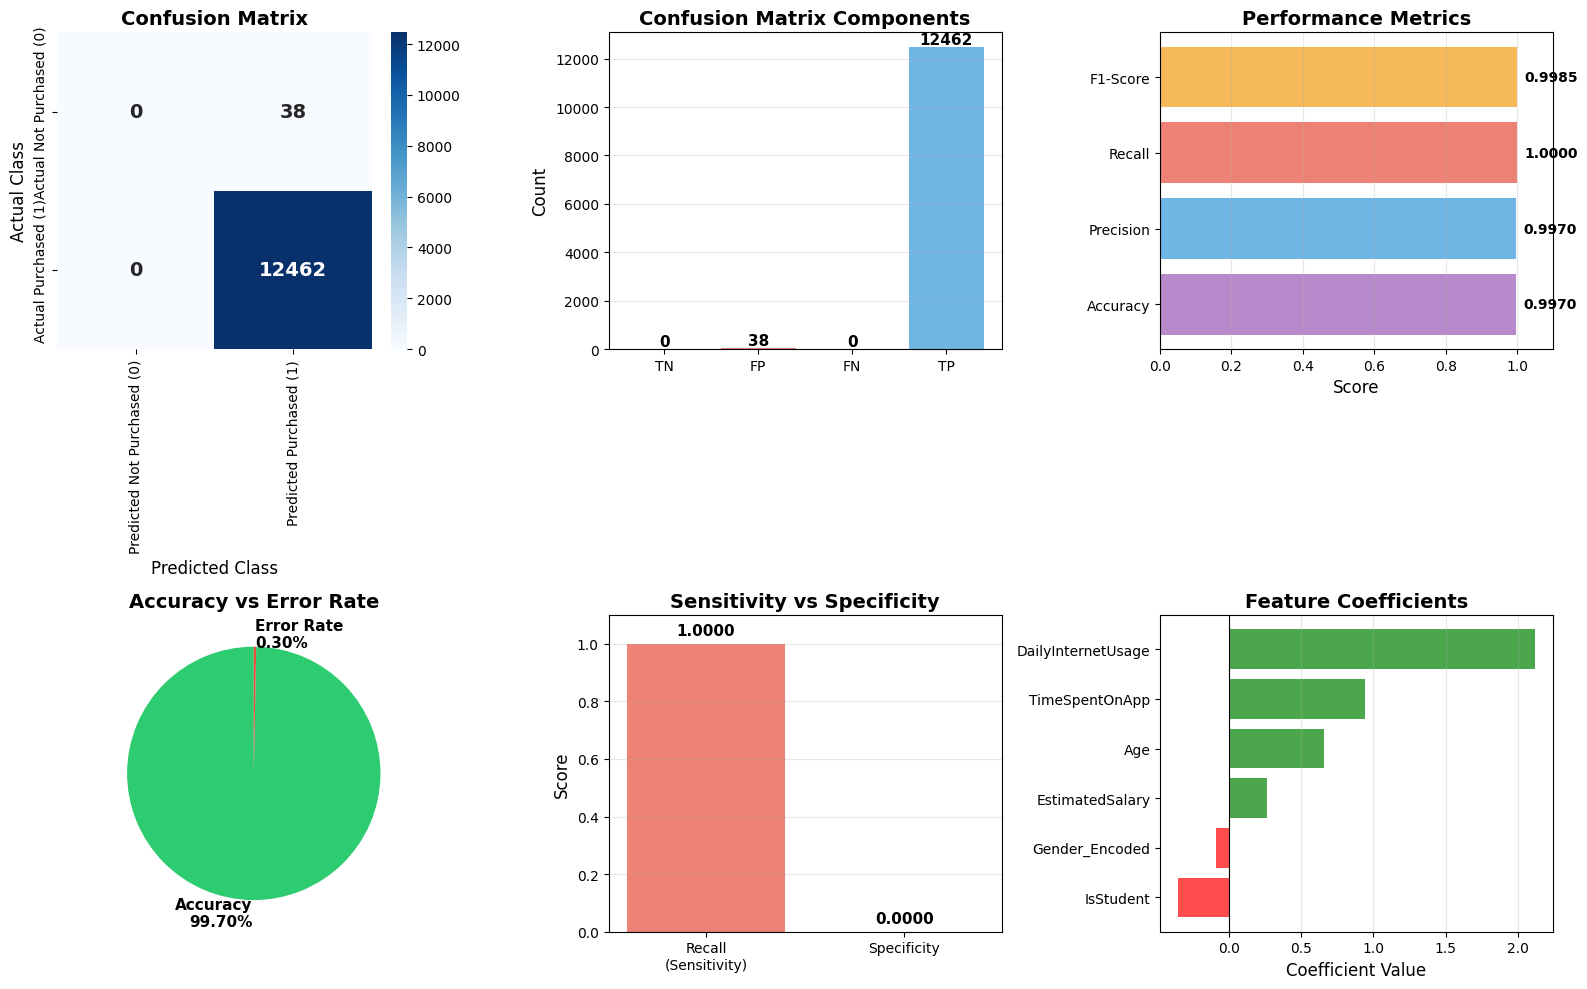

In [35]:
print("\n9. CREATING VISUALIZATIONS")

fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, 
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)

ax2 = plt.subplot(2, 3, 2)
components = ['TN', 'FP', 'FN', 'TP']
values = [TN, FP, FN, TP]
colors = ['#2ecc71', '#e74c3c', '#e67e22', '#3498db']
bars = ax2.bar(components, values, color=colors, alpha=0.7)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Confusion Matrix Components', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax3 = plt.subplot(2, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [accuracy, precision, recall, f1_score]
colors_metrics = ['#9b59b6', '#3498db', '#e74c3c', '#f39c12']
bars = ax3.barh(metrics, metric_values, color=colors_metrics, alpha=0.7)
ax3.set_xlabel('Score', fontsize=12)
ax3.set_title('Performance Metrics', fontsize=14, fontweight='bold')
ax3.set_xlim([0, 1.1])
ax3.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
             f'{metric_values[i]:.4f}',
             ha='left', va='center', fontweight='bold', fontsize=10)

ax4 = plt.subplot(2, 3, 4)
pie_data = [accuracy, error_rate]
pie_labels = [f'Accuracy\n{accuracy:.2%}', f'Error Rate\n{error_rate:.2%}']
colors_pie = ['#2ecc71', '#e74c3c']
ax4.pie(pie_data, labels=pie_labels, colors=colors_pie, autopct='',
        startangle=90, textprops={'fontsize': 11, 'weight': 'bold'})
ax4.set_title('Accuracy vs Error Rate', fontsize=14, fontweight='bold')

ax5 = plt.subplot(2, 3, 5)
sens_spec = ['Recall\n(Sensitivity)', 'Specificity']
sens_spec_values = [recall, specificity]
colors_ss = ['#e74c3c', '#3498db']
bars = ax5.bar(sens_spec, sens_spec_values, color=colors_ss, alpha=0.7)
ax5.set_ylabel('Score', fontsize=12)
ax5.set_title('Sensitivity vs Specificity', fontsize=14, fontweight='bold')
ax5.set_ylim([0, 1.1])
ax5.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{sens_spec_values[i]:.4f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax6 = plt.subplot(2, 3, 6)
coef_sorted = coef_df.sort_values('Coefficient')
colors_coef = ['red' if x < 0 else 'green' for x in coef_sorted['Coefficient']]
ax6.barh(coef_sorted['Feature'], coef_sorted['Coefficient'], color=colors_coef, alpha=0.7)
ax6.set_xlabel('Coefficient Value', fontsize=12)
ax6.set_title('Feature Coefficients', fontsize=14, fontweight='bold')
ax6.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax6.grid(axis='x', alpha=0.3)

plt.tight_layout()


ROC-AUC Score: 0.9291


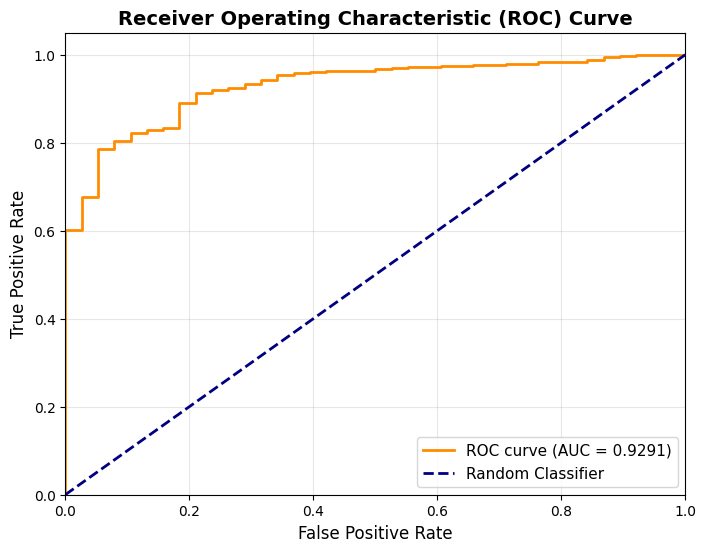

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)

print(f"\nROC-AUC Score: {roc_auc:.4f}")